# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [19]:
!pip3 install -U ucimlrepo 

In [46]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X_df = auto_mpg.data.features 
y_dt = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [47]:
y_dt.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [48]:
X_df.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


### En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

In [49]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [50]:
X_df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [51]:
y_dt.describe()

,mpg
count,398.000000
mean,23.514573
std,7.815984
min,9.000000
25%,17.500000
50%,23.000000
75%,29.000000
max,46.600000


In [82]:
X_df.isnull().sum() 
#¿Qué hacer son esos datos nulos, eliminarlos o imputación? Si se imputan ¿cuál es el mejor método?

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [17]:
!pip install seaborn

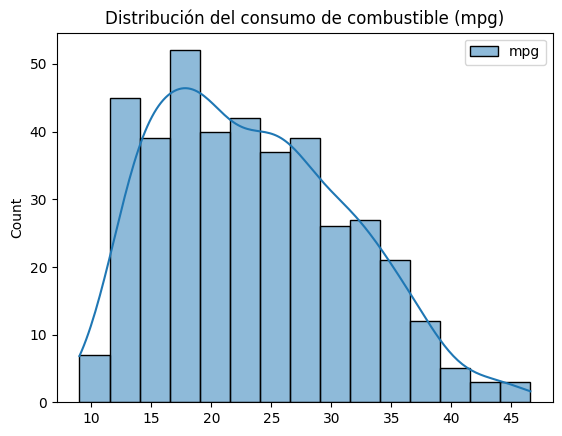

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_dt, bins=15, kde=True)
plt.title("Distribución del consumo de combustible (mpg)")
plt.show()

#¿La distribución es normal?

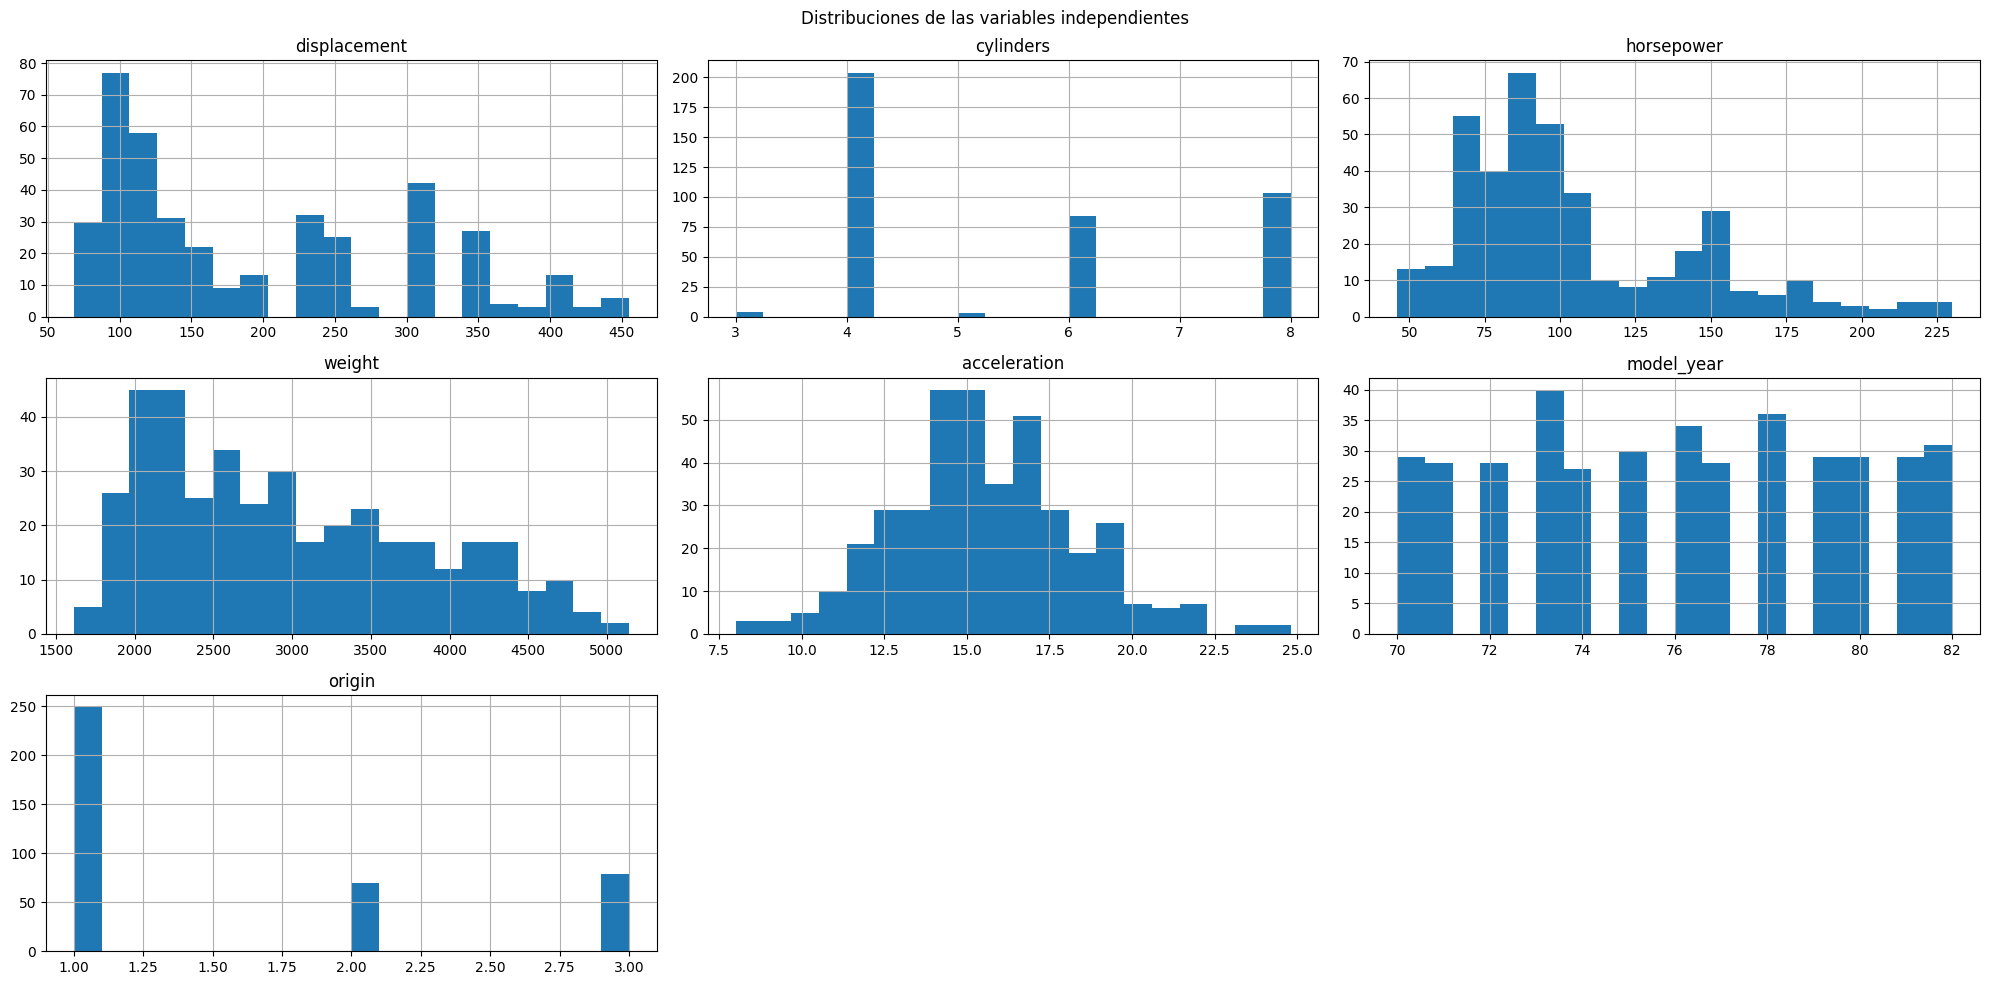

In [54]:
X_df.hist(bins=20, figsize=(20, 10))
plt.suptitle("Distribuciones de las variables independientes")
plt.tight_layout()
plt.show()

#¿Existen outliers o transformaciones necesarias?

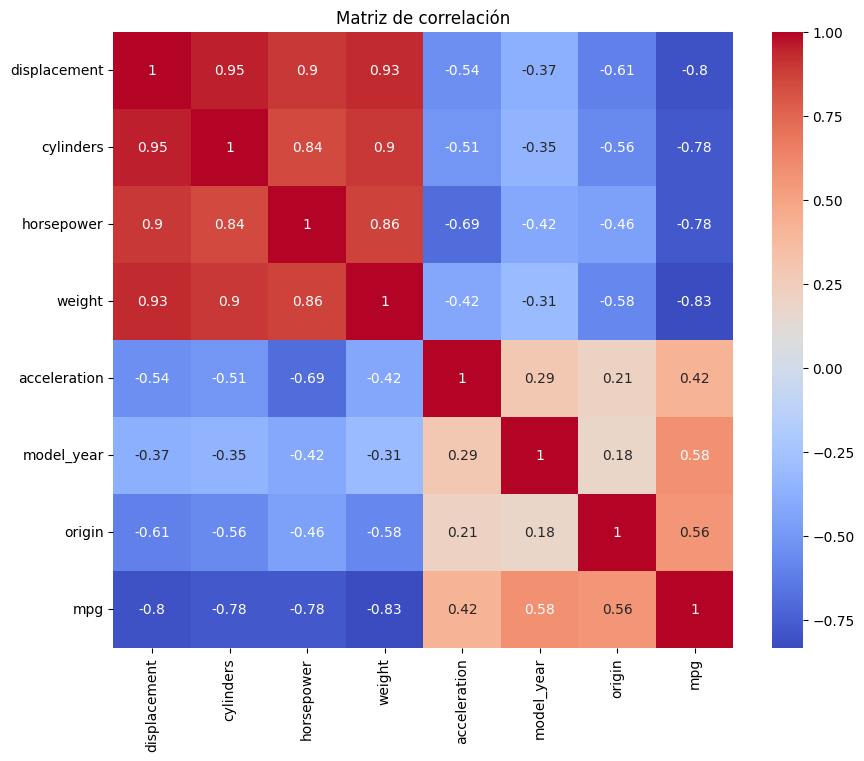

In [55]:
df = X_df.copy()
df['mpg'] = y  # Añades la variable objetivo para ver su relación con las otras

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

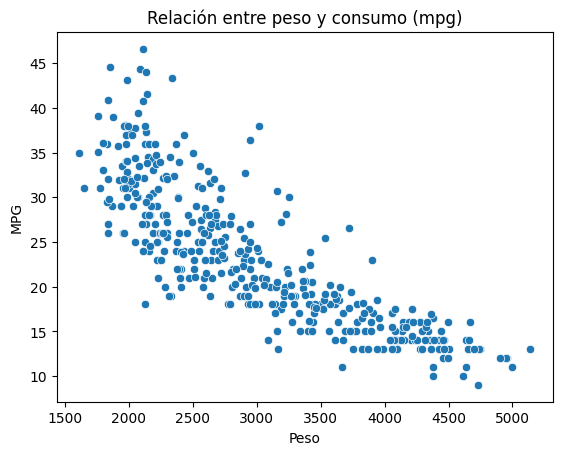

In [56]:
import seaborn as sns
sns.scatterplot(x=X_df['weight'], y=y_dt.iloc[:, 0])
plt.title("Relación entre peso y consumo (mpg)")
plt.xlabel("Peso")
plt.ylabel("MPG")
plt.show()

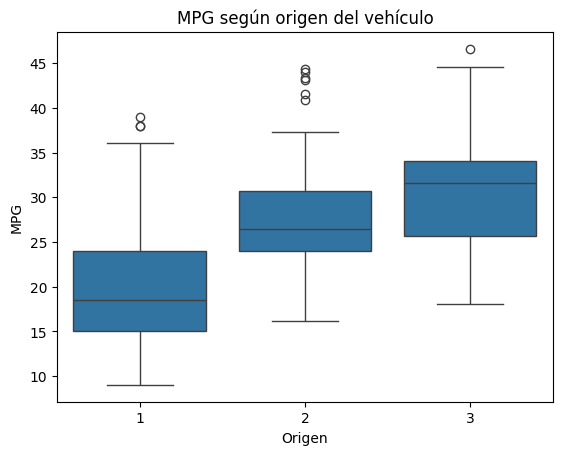

In [57]:
sns.boxplot(x=X_df['origin'], y=y_dt.iloc[:, 0])
plt.title("MPG según origen del vehículo")
plt.xlabel("Origen")
plt.ylabel("MPG")
plt.show()

### Continuación

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

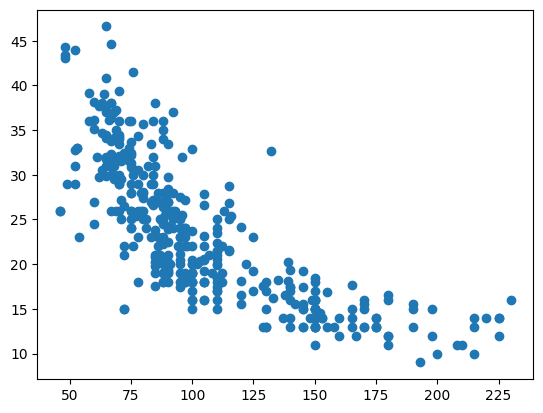

In [59]:
import matplotlib.pyplot as plt

def visualiza(df, y_dt, nombre_columna):
    # TODO dibuja la gráfica
    plt.scatter(df[nombre_columna], y)
    

visualiza(X_df, y_dt, 'horsepower')

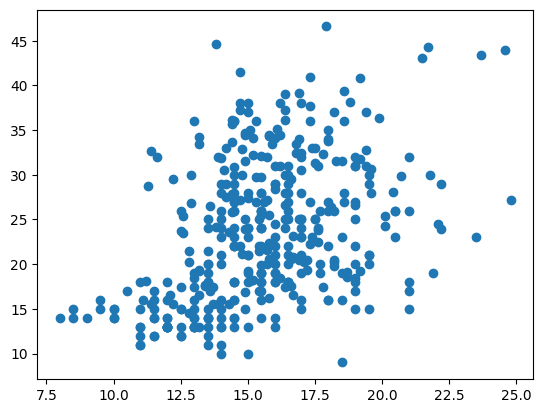

In [60]:
visualiza(X_df, y_dt,'acceleration')

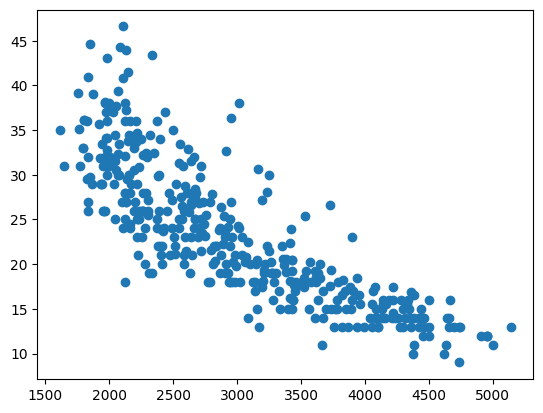

In [61]:
visualiza(X_df, y_dt, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [73]:
import numpy as np

# Tenenemos 6 datos null se deben ajustar, los relleno con la media, uso .loc p1orque el programa me estaba dando una advertencia que estaba modificando una copia de mi matriz y no la matriz en si.     
    #print(X.isnull().sum())    
def clean_null_data(X):
    #función para imputar con la media
    def imputing_null_data(X, col_name):
        X.loc[:, col_name] = X[col_name].fillna(X[col_name].mean())

    #validate if there are null values and imputing with the media
    if X.isnull().values.any():
        null_columns = X.columns[X.isnull().any()]
        for col in null_columns:
            imputing_null_data(X, col) 

def pesos_ols(X, y):
    # Implementa la fórmula matricial  
    # TODO 1 Comprueba que las dimensiones son adecuadas y corrige si no es así

    #Compruebo y ajusto que y sea un vector columna
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    #Combrobar que las carácteristicas son menores a las observaciones
    if X.shape[0] < X.shape[1]:
        X = X.T
    
    # TODO 2 Prepara la matriz X para que tenga la forma adecuada para aplicar la fórmula 
    #Ingresando los unos a la matriz
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    print()
    
    # TODO 3 Calcula los pesos
    w = np.linalg.inv((X.T @ X)) @ X.T @ y
    
    return w




In [75]:
import pandas as pd
# Array de prueba!!
X_test = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_test = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])


In [91]:
w = pesos_ols(X_test, y_test)



<class 'numpy.ndarray'>


Hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10. Como pista, el resultado que he obtenido para este array de prueba es el siguiente:

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 1.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [102]:
# Vuelvo a traer limpio mi dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X_df = auto_mpg.data.features 
y_dt = auto_mpg.data.targets 



[[ 4.63173644e+01]
 [-7.67661006e-03]]


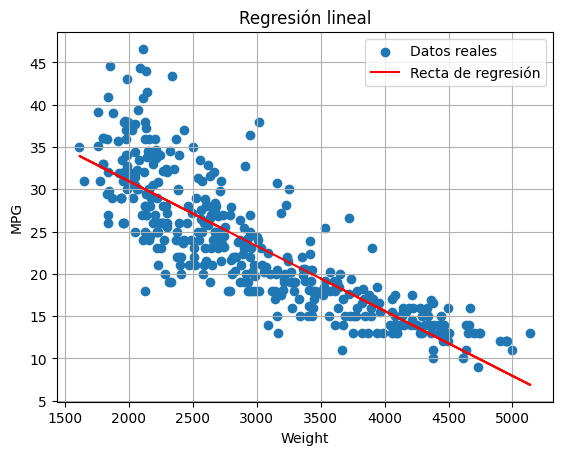

In [128]:
# TODO Aplica el modelo y dibuja la recta junto con los datos
import matplotlib.pyplot as plt

#Limpio el dataset de los valores nulos
clean_null_data(X_df)

# Extraigo la variable independiente "Weight" en array
X_array = X_df[['weight']].values

# Transformo data target a arrays
y_array = y_dt.to_numpy()

# aplico modelo con la variable weight

W = pesos_ols(X_array, y_array)
print(W)

# Predicción con el modelo: y_pred = w0 + w1 * x
y_pred = W[0] + W[1] * X_array


plt.scatter(X_array, y_array, label='Datos reales')
plt.plot(X_array, y_pred, color='red', label='Recta de regresión')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.legend()
plt.title('Regresión lineal')
plt.grid(True)
plt.show()

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [126]:
!pip install scikit-learn

  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/8.7 MB 7.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/8.7 MB 5.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.6/8.7 MB 3.3 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 2.8 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.8 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.7 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.0 MB/s eta 0:00:03
   ------------------ --------------------- 

In [127]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



En el caso del método de mínimos cuadrados se ha usado la formula cerrada para hallar los coeficientes del vector w es decir: w = np.linalg.inv((X.T @ X)) @ X.T @ y .  
Por otro lado en el método de el descenso del gradiente, estos coeficiente se hallan mediante un proceso iterativo en el que a través de la gradiente se halla el error de la predicción y cada iteración este error disminuye hasta acercarse a nivel infimo a los coeficientes del vector w. 

## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [21]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
    # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    # Si eliges otra forma de resolverlo, puedes borrar esta parte
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0
    
    # TODO 1 Añade la columna de 1s
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  
    
    # TODO 2 Haz un bucle para las iteraciones 
    for i in range(n_iter):
        y_pred = X_bias @ w
        error = y - y_pred
        gradient = - (X_bias.T @ error) / X_bias.shape[0]
        w = w - eta * gradient
        loss = 0.5 * np.mean(error ** 2)

    # TODO 3 Dentro del bucle tendrás que actualizar el error y los pesos y añadirlos a las listas
        loss_iter.append(loss)
        w_iter.append(w)
        
    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)


eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183695.36963666]
 [ 40682.97678324]]


### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [23]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

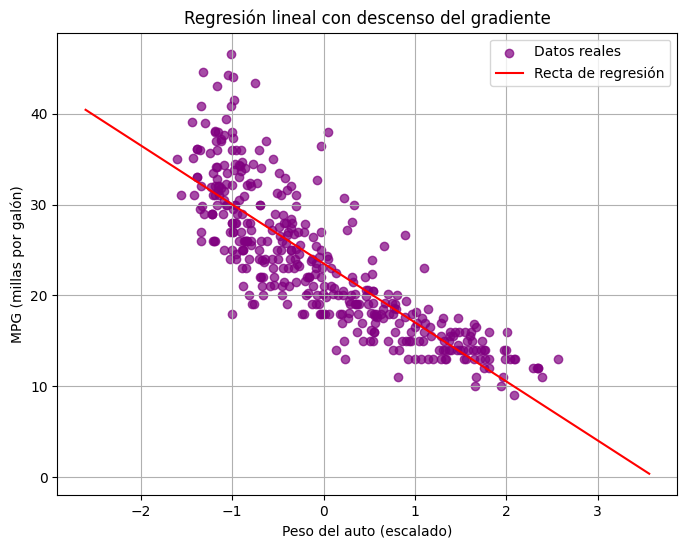

In [65]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# TODO 1 Punto inicial y learning rate

eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

# TODO 2 Aplicamos el algoritmo

w_iter, loss_iter = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1

# TODO 3 Dibuja la gráfica

x_vals = np.linspace(x_min, x_max, 100).reshape(-1, 1)  
x_vals_bias = np.hstack((np.ones_like(x_vals), x_vals))
y_vals = x_vals_bias @ w_iter[-1]

plt.figure(figsize=(8, 6))
plt.scatter(X_gd, y_gd, label='Datos reales', color='purple', alpha=0.7)
plt.plot(x_vals, y_vals, label='Recta de regresión', color='red')
plt.xlabel('Peso del auto (escalado)')
plt.ylabel('MPG (millas por galón)')
plt.title('Regresión lineal con descenso del gradiente')
plt.legend()
plt.grid(True)
plt.show()
